In [82]:
import pandas as pd
from sklearn.metrics import precision_score,recall_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
############No need to run these codes now ############################

In [83]:
presultsOurYeast1=pd.read_csv("./results/tesryeast1.txt",header =None)

In [99]:
presultsOurYeast0=pd.read_csv("./results/tesryeast0.txt",header =None)

In [11]:
presultsOurYeast1

,0,1,2,3
0,560,0.01,0.66,0.40
1,561,0.00,0.97,0.13
2,562,0.00,0.43,0.79
3,563,0.01,0.00,0.05
4,564,0.00,0.79,0.47
...,...,...,...,...
995,835,0.00,0.35,0.35
996,836,0.00,0.16,0.95
997,837,0.00,0.75,0.78
998,838,0.00,0.63,0.98


In [84]:
presultsLinear=pd.read_csv("./results/tesrsinedat.txt",header=None)

In [85]:
presultsLinear.loc[:,0]=1

In [86]:
presultsInd=pd.read_csv("./results/tesrInd.txt",header=None)

In [87]:
presultsInd.loc[:,0]=0

In [100]:
presultsOurYeast1.loc[:,0]=1 #labelling it as gnd truth 1 

In [101]:
presultsOurYeast0.loc[:,0]=0  #labelling it as gnd truth 0

In [102]:
presultsOurYeast=pd.concat([presultsOurYeast1,presultsOurYeast0],ignore_index=True)

In [88]:
presultMix=pd.concat([presultsLinear,presultsInd],ignore_index=True)

In [21]:
#presultsOurYeast['results']=presultsOurYeast.apply (lambda row: 1 if max(row[1],row[2],row[3]) <0.05   else 0, axis=1)

In [103]:
presultsOurYeast.columns = ['GroundTruth','p_L->A', 'p_L->B', 'diff(B|A,B|A,L)']#, 'final_call']

In [89]:
presultMix.columns= ['GroundTruth','p_L->A', 'p_L->B', 'diff(B|A,B|A,L)']

In [104]:
presultsOurYeast

,GroundTruth,p_L->A,p_L->B,"diff(B|A,B|A,L)"
0,1,0.01,0.66,0.40
1,1,0.00,0.97,0.13
2,1,0.00,0.43,0.79
3,1,0.01,0.00,0.05
4,1,0.00,0.79,0.47
...,...,...,...,...
1995,0,0.00,0.45,0.99
1996,0,0.00,0.35,0.00
1997,0,0.00,0.27,0.79
1998,0,0.00,0.05,0.84


In [91]:
presultMix

,GroundTruth,p_L->A,p_L->B,"diff(B|A,B|A,L)"
0,1,0.00,0.08,0.05
1,1,0.00,0.01,0.00
2,1,0.00,0.00,0.53
3,1,0.00,0.00,0.00
4,1,0.00,0.00,0.07
...,...,...,...,...
260,0,0.23,0.58,0.30
261,0,0.03,0.01,0.63
262,0,0.14,0.00,0.62
263,0,0.00,0.00,0.16


In [92]:
presultMix.to_csv("MixSineandIndOurmethod.csv",index=False)

In [105]:
#presultsOurYeast.to_csv("YeastbothresultsOurmethod.csv",index=False)

In [106]:
test=pd.read_csv("YeastbothresultsOurmethod.csv")

In [107]:
test

,GroundTruth,p_L->A,p_L->B,"diff(B|A,B|A,L)"
0,1,0.01,0.66,0.40
1,1,0.00,0.97,0.13
2,1,0.00,0.43,0.79
3,1,0.01,0.00,0.05
4,1,0.00,0.79,0.47
...,...,...,...,...
1995,0,0.00,0.45,0.99
1996,0,0.00,0.35,0.00
1997,0,0.00,0.27,0.79
1998,0,0.00,0.05,0.84


In [108]:
citresultsyeast1= pd.read_csv("../LinearDifferentvalues/CIT_testing/results_cit_yeast1.csv")

In [93]:
citresultsLinear=pd.read_csv("../LinearDifferentvalues/CIT_testing/results_cit_sine.csv")

In [109]:
citresultsyeast1.loc[:,'p_res']=1

In [94]:
citresultsLinear.loc[:,'p_res']=1

In [95]:
citresultsLinear

,p_cit,p_TL,p_TG,p_GL,p_Lind,p_res
0,0.368165,0.368165,1.168653e-01,2.921708e-01,0.167296,1
1,0.762668,0.184285,1.157742e-02,7.626679e-01,0.731331,1
2,0.954974,0.954974,1.159190e-05,9.552992e-02,0.921065,1
3,0.747074,0.034780,1.122873e-12,7.470740e-01,0.009708,1
4,1.000000,0.019203,4.622717e-16,1.603040e-01,1.000000,1
...,...,...,...,...,...,...
116,0.557481,0.557481,3.683477e-01,6.041759e-235,0.272225,1
117,0.653631,0.653631,5.296709e-01,2.027890e-267,0.343932,1
118,0.870004,0.624709,1.734063e-01,3.597769e-250,0.870004,1
119,0.692347,0.079510,5.194507e-01,8.347638e-251,0.692347,1


In [110]:
citresultsyeast0= pd.read_csv("../LinearDifferentvalues/CIT_testing/results_cit_yeast0.csv")

In [96]:
citresultsInd=pd.read_csv("../LinearDifferentvalues/CIT_testing/results_cit_ind.csv")

In [111]:
citresultsyeast0.loc[:,'p_res']=0

In [97]:
citresultsInd.loc[:,'p_res']=0

In [98]:
citresultsMix=pd.concat([citresultsLinear,citresultsInd],ignore_index=True)

In [112]:
citresultsyeast=pd.concat([citresultsyeast1,citresultsyeast0],ignore_index=True)

In [113]:
citresultsyeast

,p_cit,p_TL,p_TG,p_GL,p_Lind,p_res
0,0.999997,0.526752,1.451417e-42,3.025060e-13,0.999997,1
1,0.770998,0.770998,3.154449e-05,4.327071e-06,0.654044,1
2,0.160258,0.013723,1.478439e-01,2.326003e-04,0.160258,1
3,0.864296,0.304704,8.642960e-01,2.939863e-71,0.735532,1
4,0.999992,0.797223,4.165822e-12,2.051547e-34,0.999992,1
...,...,...,...,...,...,...
1995,1.000000,0.044756,4.255630e-08,3.497283e-07,1.000000,0
1996,0.923909,0.116567,1.282423e-01,5.183201e-60,0.923909,0
1997,1.000000,0.246241,1.240799e-121,4.313804e-87,1.000000,0
1998,1.000000,0.767710,1.409244e-20,9.823368e-59,1.000000,0


In [99]:
citresultsMix

,p_cit,p_TL,p_TG,p_GL,p_Lind,p_res
0,0.368165,3.681653e-01,1.168653e-01,2.921708e-01,0.167296,1
1,0.762668,1.842854e-01,1.157742e-02,7.626679e-01,0.731331,1
2,0.954974,9.549737e-01,1.159190e-05,9.552992e-02,0.921065,1
3,0.747074,3.478044e-02,1.122873e-12,7.470740e-01,0.009708,1
4,1.000000,1.920307e-02,4.622717e-16,1.603040e-01,1.000000,1
...,...,...,...,...,...,...
260,0.693343,1.113714e-29,5.810552e-01,6.015304e-232,0.693343,0
261,0.788440,1.390011e-31,7.884398e-01,6.374398e-221,0.601401,0
262,0.734262,3.525310e-53,4.188774e-01,1.747853e-227,0.734262,0
263,0.951677,9.990723e-51,5.198720e-02,5.086993e-241,0.951677,0


In [114]:
citresultsyeast.rename(columns={'p_res':'GroundTruth'},inplace=True)

In [100]:
citresultsMix.rename(columns={'p_res':'GroundTruth'},inplace=True)

In [101]:
citresultsMix.to_csv("MixSineandIndCIT.csv",index=False)

In [115]:
#citresultsyeast.to_csv("YeastbothresultsCIT.csv",index=False)

In [116]:
test=pd.read_csv("YeastbothresultsCIT.csv")

In [117]:
test

,p_cit,p_TL,p_TG,p_GL,p_Lind,GroundTruth
0,0.999997,0.526752,1.451417e-42,3.025060e-13,0.999997,1
1,0.770998,0.770998,3.154449e-05,4.327071e-06,0.654044,1
2,0.160258,0.013723,1.478439e-01,2.326003e-04,0.160258,1
3,0.864296,0.304704,8.642960e-01,2.939863e-71,0.735532,1
4,0.999992,0.797223,4.165822e-12,2.051547e-34,0.999992,1
...,...,...,...,...,...,...
1995,1.000000,0.044756,4.255630e-08,3.497283e-07,1.000000,0
1996,0.923909,0.116567,1.282423e-01,5.183201e-60,0.923909,0
1997,1.000000,0.246241,1.240799e-121,4.313804e-87,1.000000,0
1998,1.000000,0.767710,1.409244e-20,9.823368e-59,1.000000,0


In [ ]:
######## Run it from here ###########

In [102]:
#cit=pd.read_csv("YeastbothresultsCIT.csv")
cit=pd.read_csv("MixSineandIndCIT.csv")
#ourmethod=pd.read_csv("YeastbothresultsOurmethod.csv")
ourmethod=pd.read_csv("MixSineandIndOurmethod.csv")

In [103]:
ourmethod.columns

Index(['GroundTruth', 'p_L->A', 'p_L->B', 'diff(B|A,B|A,L)'], dtype='object')

In [104]:
kvalues=np.linspace(0,1,1000)

In [105]:
kvalues

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

In [106]:
def plot_pr(path,kvalues,cit=False):
    precision=[]
    recall=[]
    for i in kvalues:
        data=pd.read_csv(path)
        if(cit==False):
            #chanign from < to <=
            data['results']=data.apply (lambda row: 1 if max(row[1],row[2],row[3]) <=i   else 0, axis=1)
        else:
            data['results']=data.apply (lambda row: 1 if row[0] <=i   else 0, axis=1)
        precision.append(precision_score(data['GroundTruth'],data['results']))#,zero_division=1))
        recall.append(recall_score(data['GroundTruth'],data['results']))#,zero_division=1))
    #return [data['GroundTruth'],data['results']]
    zipped=zip(precision,recall)
    z=sorted(zipped, key = lambda t: t[1])
    precision,recall=zip(*z)
    return [recall,precision]

In [107]:
#x_our,y_our=plot_pr("YeastbothresultsOurmethod.csv",kvalues)
x_our,y_our=plot_pr("MixSineandIndOurmethod.csv",kvalues)
#PrecisionRecallDisplay.from_predictions(x_our, y_our, name="LinearSVC",pos_label=0)
aupr_our=metrics.auc(x_our,y_our)

In [112]:
y_our

(0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8,
 0.8,
 0.8,
 0

In [49]:
x_our

(0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,


In [108]:
#x_cit,y_cit=plot_pr("YeastbothresultsCIT.csv",kvalues,True)
#kvalues[0]=min(cit['p_cit'])
x_cit,y_cit=plot_pr("MixSineandIndCIT.csv",kvalues,True)
#PrecisionRecallDisplay.from_predictions(x_our, y_our, name="LinearSVC")
aupr_cit=metrics.auc(x_cit,y_cit)

/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
y_our

(0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8,
 0.8,
 0.8,
 0

In [110]:
list(y_cit)

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.9841269841269841,
 0.984375,
 0.984375,
 0.984375,
 0.984375,
 0.984375,
 0.984375,
 0.984375,
 0.9846153846153847,
 0.9846153846153847,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9701492537313433,
 0.9701492537313433,
 0.97014925

In [111]:
y_cit=list(y_cit)
y_cit[0]=y_cit[1]

In [74]:
x_our[0]

0.002

In [116]:
x_our=list(x_our)
x_our.insert(0,0)
y_our=list(y_our)
y_our.insert(0,0.9047619047619048)

AUPR for our method 0.5065096133750231
AUPR for CIT 0.7026575954016476


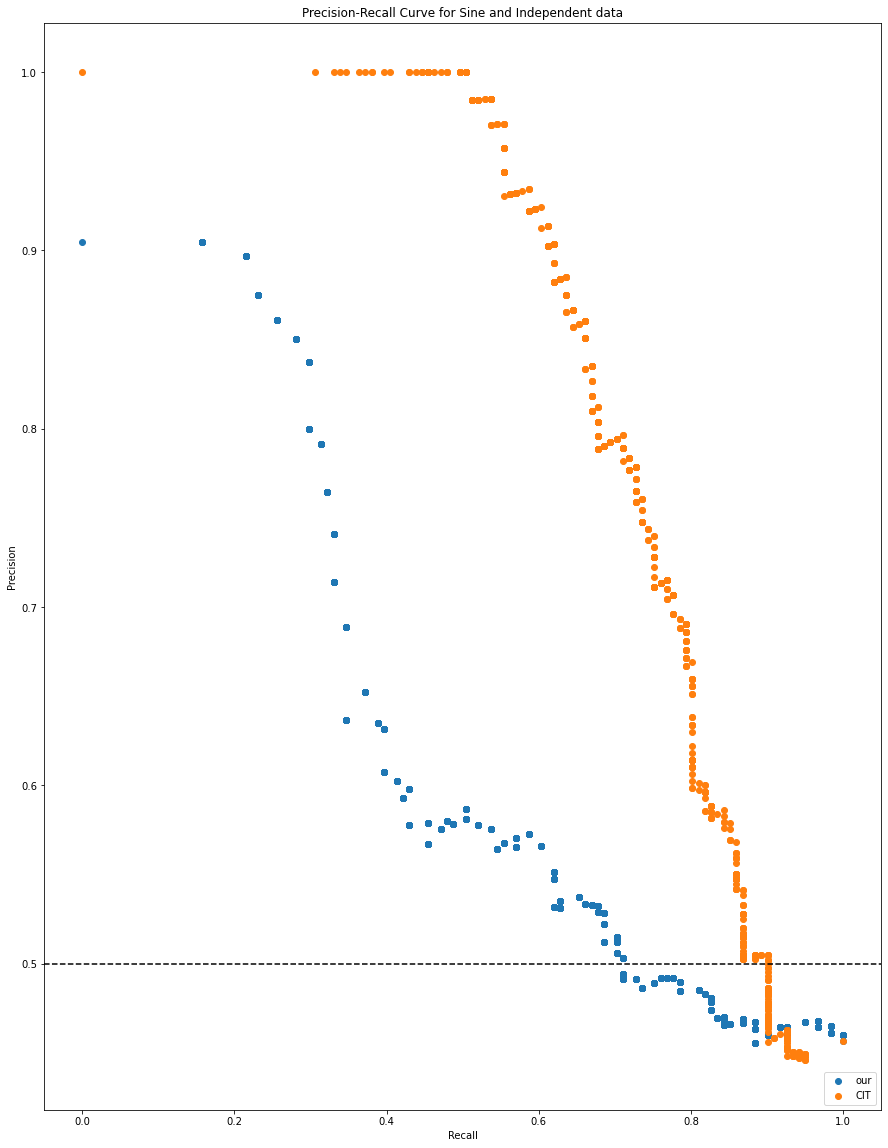

In [120]:
plt.figure(figsize=(15,20))
plt.scatter(x_our,y_our,label="our")
plt.scatter(x_cit,y_cit,label="CIT")
plt.axhline(y=0.5, color='k', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Sine and Independent data")
print("AUPR for our method",aupr_our)
print("AUPR for CIT",aupr_cit)
plt.show()

In [45]:
x_our[-1]

0

In [118]:
metrics.auc(x_our,y_our)

0.6485796645359834

In [119]:
metrics.auc(x_cit,y_cit)

0.8555501573851187